# Yandex.Afisha marketing costs and suggestions for their optimization

## Content <a id='content'></a>
1. [Project goal](#start)
3. [Preparing data for analysis](#prepare)
4. [Data analysis](#investigation)
    * [Distribution by device](#device_stats)
    * [Distribution by source](#source_stats)
    * [Attendance rate](#visit)
     * [Count of users per day, week, month](#visit_dau)
     * [Count of sessions per day](#visit_session)
     * [Duration of one session](#visit_duration)
     * [Retention rate](#visit_retention)
    * [Orders](#orders)
     * [When users start buying](#orders_delta)
     * [Count of purchases per period](#orders_count)
     * [Average check](#orders_mean)
     * [Lifetime Value (LTV)](#orders_ltv)
    * [Marketing](#marketing)
     * [Total expenses / for each source / by time](#marketing_costs)
     * [Customer acquisition cost (CAC)](#marketing_cac)
     * [Return of investment (ROI)](#marketing_roi)
5. [Summary](#resume)
6. [Recommendations](#recommendations)

#  Project goal <a id="start"></a>

In this report, we will find out 

- how people use Yandex.Afisha,
- when they start buying,
- how much money each client brings in
- when the client pays off.

Based on the results, we will form recommendations for optimizing expenses in the marketing department.

 # Preparing data for analysis  <a id="prepare"></a>

[Back to content](#content)

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

## Visits

In [3]:
visits=pd.read_csv('visits_log.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.sample()

,Device,End Ts,Source Id,Start Ts,Uid
137792,desktop,2018-01-23 18:59:00,5,2018-01-23 18:47:00,11210368076528786733


Let's lower-case the column names and replace the spaces with underscores. 

In [5]:
visits.columns = map(str.lower, visits.columns)
visits.columns=visits.columns.str.replace(' ','_')
visits.sample(3)

,device,end_ts,source_id,start_ts,uid
147984,desktop,2017-12-17 15:17:00,5,2017-12-17 15:15:00,12868992654100050725
312251,desktop,2017-11-14 15:37:00,2,2017-11-14 15:17:00,13198782364410315917
202386,desktop,2017-11-01 16:20:00,3,2017-11-01 16:16:00,18139463903172498782


Let's change the columns with the date to the date format.

In [6]:
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

Let's do the same with the other tables.

## Orders

In [8]:
orders=pd.read_csv('orders_log.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders.columns = map(str.lower, orders.columns)
orders.columns=orders.columns.str.replace(' ','_')
orders.sample(3)

,buy_ts,revenue,uid
8993,2017-09-25 13:51:00,4.77,9350434536011803669
40366,2018-03-17 23:10:00,1.47,12077569444826449142
7147,2017-09-07 21:13:00,2.44,1925885267938791193


In [10]:
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

## Costs

In [12]:
costs=pd.read_csv('costs.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
costs.columns = map(str.lower, costs.columns)
costs.columns = map(str.lower, costs.columns)
costs.sample(3)

,source_id,dt,costs
744,3,2017-06-19,347.54
326,1,2018-04-25,69.61
1682,5,2018-01-17,122.96


In [14]:
costs['dt']=pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [15]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

In [16]:
costs=costs.rename(columns={'dt':'obtain_date'})
costs.sample()

,source_id,obtain_date,costs
2114,9,2018-03-26,29.06


## Users

Let's create a table with users, add the dates of their first visit, the source of the visit, and the device.

In [17]:
users=(visits.sort_values(by=['uid','start_ts']).groupby('uid')
             .agg({'start_ts':'first','source_id':'first','device':'first'})
      .rename(columns={'start_ts':'obtain_ts'}))
users['obtain_date']=users['obtain_ts'].dt.date
users['obtain_month']=users['obtain_ts'].astype('datetime64[M]')
users=(users.reset_index().set_index(['source_id','obtain_date'])
       .join(costs.set_index(['source_id','obtain_date']), how='left'))
users.head()

uid           obtain_ts   device  \
source_id obtain_date                                                     
1         2017-06-01    469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01    618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01   1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01   1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01   1548840741623289234 2017-06-01 01:18:00  desktop   

                      obtain_month  costs  
source_id obtain_date                      
1         2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2

Adding the cost of each user.

In [18]:
user_cost=(users.groupby(['source_id','obtain_date']).agg({'device':'count','costs':'mean'})
           .rename(columns={'device':'users'}))
user_cost['obtain_cost']=user_cost['costs']/user_cost['users']
users=users.join(user_cost[['obtain_cost']], how = 'left')
users=users.reset_index().set_index('uid')[['obtain_ts','obtain_date','obtain_month','source_id','device','obtain_cost']]
users.head()

,obtain_ts,obtain_date,obtain_month,source_id,device,obtain_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


# Data analysis<a id="investigation"></a>

[Back to content](#content)

## Distribution by device<a id="device_stats"></a>

In [19]:
dimenstion_d=['device']
cohorts_d=users.groupby(dimenstion_d).agg({'source_id':'count'}).rename(columns={'source_id':'cohort_d_size'})
cohorts_d  

,cohort_d_size
device,
desktop,160795
touch,67374


<div style="border:solid black 2px; padding: 20px"> The web-site is used from desktops 2.5 times more than from phones and tablets.</div>

## Distribution by source <a id="source_stats"></a>

In [20]:
dimenstion_s=['source_id']
cohorts_s=users.groupby(dimenstion_s).agg({'device':'count'}).rename(columns={'device':'cohort_s_size'})
cohorts_s.sort_values(by='cohort_s_size',ascending=False) 

,cohort_s_size
source_id,
4,72346
3,66116
5,49237
2,17616
1,9469
10,6903
9,6448
7,32
6,2


<div style="border:solid black 2px; padding: 20px"> Sources 4,3 and 5 are the most popular, and sources 6 and 7 are the least popular.</div>

##  Attendance rate <a id="visit"></a>

[Back to content](#content)

### Count of users per day, week, month <a id="visit_dau"></a>

In [21]:
visits.sample()

,device,end_ts,source_id,start_ts,uid
210110,touch,2018-01-15 15:58:00,4,2018-01-15 15:57:00,543741091865407067


Let's extract the year, month, day, and date without time from the table with the sessions.

In [22]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits['session_cal_month'] = visits['start_ts'].astype('datetime64[M]')
visits.sample()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month
288312,desktop,2017-12-15 14:58:00,1,2017-12-15 14:44:00,6661610529277171451,2017,12,50,2017-12-15,2017-12-01


Count of visitors per month:

In [23]:
mau_total=visits.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()
mau_total

uid    23228.416667
dtype: float64

Count of visitors per week:

In [24]:
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
wau_total

uid    5716.245283
dtype: float64

Count of visitors per day:

In [25]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
dau_total

uid    907.991758
dtype: float64

Frequency of resource usage per week as a percentage:

In [26]:
sticky_wau=dau_total/wau_total*100
sticky_wau

uid    15.884409
dtype: float64

Frequency of resource usage per month as a percentage:

In [27]:
sticky_mau=dau_total/mau_total*100
sticky_mau

uid    3.90897
dtype: float64

<div style="border:solid black 2px; padding: 20px">  On average, the site  is visited by 23,228 people per month, 5,716 per week, and 908 daily.

Degree of engagement: every day 4% of the audience per month and 15% of the audience per week use the resource. This indicator is not very high (the minimum possible - 3% monthly coefficient and 14% - weekly). </div>

In [28]:
visits.pivot_table(index='session_cal_month',columns='device', values='uid', aggfunc='count')

device,desktop,touch
session_cal_month,,
2017-06-01,12358,4147
2017-07-01,12950,4878
2017-08-01,10854,3501
2017-09-01,17356,6551
2017-10-01,27392,10511
2017-11-01,32917,11052
2017-12-01,31112,10871
2018-01-01,26577,10362
2018-02-01,27077,10105


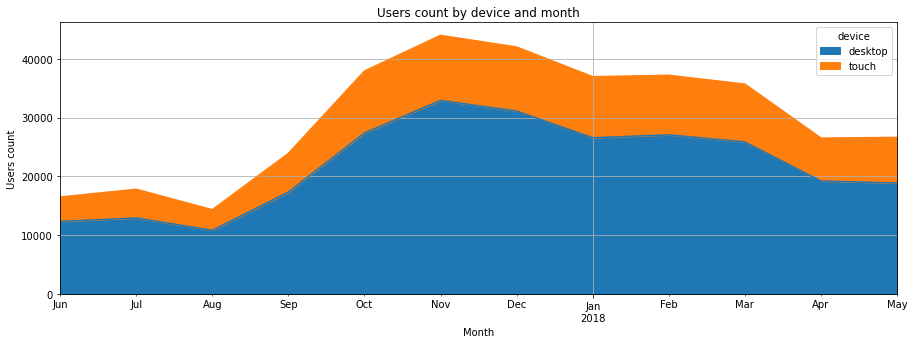

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
platforms=['desktop','touch']
(
visits
    .query('device.isin(@platforms)', engine='python')
    .pivot_table(index='session_cal_month',columns='device', values='uid', aggfunc='count')
    .plot(ax=ax,kind='area')
)
plt.xlabel('Month')
plt.ylabel('Users count')
plt.title('Users count by device and month')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px"> The site is more often accessed from desktops than from touchscreens. The peak of attendance was at the end of autumn - the beginning of winter, more than 40,000 visitors (it's cold to walk outside, all sorts of holidays are ahead). </div>

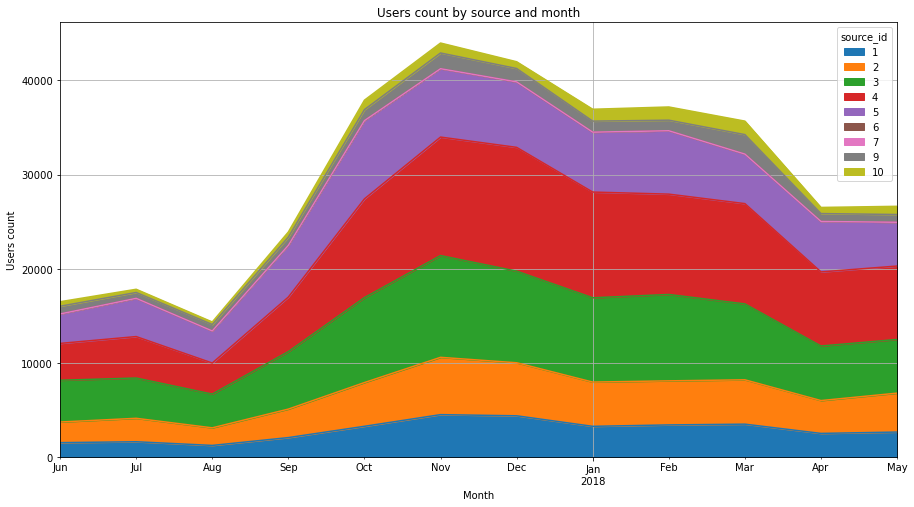

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
(
visits
    .pivot_table(index='session_cal_month',columns='source_id', values='uid', aggfunc='count')
    .plot(ax=ax,kind='area')
)
plt.xlabel('Month')
plt.ylabel('Users count')
plt.title('Users count by source and month')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px"> Most of the visitors come from sources 3,4,5. And the distribution is maintained between the sources for the entire time period. </div>

### Count of sessions per day<a id="visit_session"></a>

In [31]:
visits.sample()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month
166838,touch,2017-09-04 23:11:00,4,2017-09-04 22:58:00,10920467703379236979,2017,9,36,2017-09-04,2017-09-01


In [32]:
day_count = visits.groupby('session_date').agg({'uid': 'count'}).mean()
day_count

uid    987.362637
dtype: float64

<div style="border:solid black 2px; padding: 20px">  On average, there are 987 sessions per day on the billboard. </div>

Let's look at the distribution by device.

In [33]:
day_count_d=visits.groupby(['session_date','device']).agg({'uid': ['count']})
day_count_d.columns = ['n_sessions']
day_count_d=(day_count_d
             .reset_index()
             .pivot_table(index='session_date',columns='device', values='n_sessions', aggfunc='mean')
            )
day_count_d

device,desktop,touch
session_date,,
2017-06-01,501.0,163.0
2017-06-02,498.0,160.0
2017-06-03,329.0,148.0
2017-06-04,349.0,161.0
2017-06-05,693.0,200.0
...,...,...
2018-05-27,426.0,246.0
2018-05-28,835.0,321.0
2018-05-29,751.0,284.0


In [34]:
day_count_d.reset_index().describe().T.sort_values(by='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
desktop,364.0,721.337912,322.327697,1.0,457.25,711.0,961.5,3152.0
touch,363.0,266.757576,110.862623,47.0,181.00,278.0,337.0,890.0


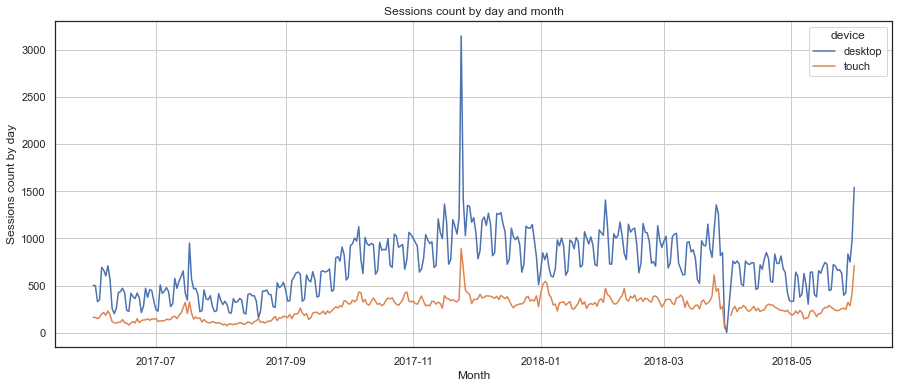

In [134]:
day_count_d.plot(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Sessions count by day')
plt.title('Sessions count by day and month')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px"> On average, there are 720 sessions per day from desktops and 270 from touchscreens. </div>

Distribution by source.

In [36]:
day_count_s=visits.groupby(['session_date','source_id']).agg({'uid': ['count']})
day_count_s.columns = ['n_sessions']
day_count_s=(day_count_s
            .reset_index()
            .pivot_table(index='session_date',columns='source_id', values='n_sessions', aggfunc='mean')
            )
day_count_s

source_id,1,2,3,4,5,6,7,9,10
session_date,,,,,,,,,
2017-06-01,70.0,85.0,185.0,141.0,122.0,NaN,NaN,52.0,9.0
2017-06-02,60.0,98.0,181.0,160.0,123.0,NaN,NaN,15.0,21.0
2017-06-03,40.0,64.0,124.0,112.0,91.0,NaN,NaN,22.0,24.0
2017-06-04,51.0,59.0,141.0,115.0,110.0,NaN,NaN,15.0,19.0
2017-06-05,86.0,108.0,269.0,175.0,141.0,NaN,NaN,78.0,36.0
...,...,...,...,...,...,...,...,...,...
2018-05-27,67.0,90.0,145.0,241.0,112.0,NaN,NaN,7.0,10.0
2018-05-28,115.0,141.0,232.0,358.0,205.0,NaN,NaN,60.0,45.0
2018-05-29,113.0,151.0,259.0,288.0,164.0,NaN,NaN,28.0,32.0


In [37]:
day_count_s.reset_index().describe().T.sort_values(by='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
source_id,,,,,,,,
4,363.0,280.424242,124.095297,32.0,171.5,300.0,376.5,783.0
3,363.0,235.840220,98.626321,32.0,154.0,238.0,305.0,965.0
5,363.0,184.311295,68.697387,33.0,134.5,181.0,227.0,427.0
2,363.0,131.201102,65.523610,18.0,84.5,131.0,163.5,649.0
1,364.0,93.739011,51.809680,1.0,59.0,91.0,120.0,615.0
9,363.0,36.575758,47.929353,1.0,9.5,22.0,52.5,567.0
10,363.0,27.617080,19.365329,1.0,14.0,23.0,37.0,135.0
7,34.0,1.058824,0.238833,1.0,1.0,1.0,1.0,2.0
6,6.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


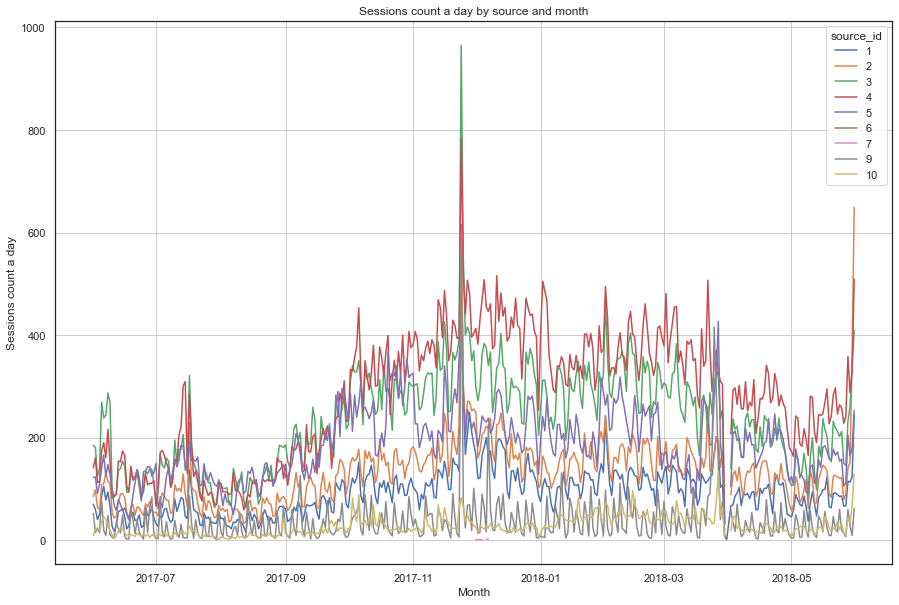

In [135]:
day_count_s.plot(figsize=(15,10))
plt.xlabel('Month')
plt.ylabel('Sessions count a day')
plt.title('Sessions count a day by source and month')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px"> Most of the sessions were made by users who came from sources 3 and 4.</div>

Let's see how many sessions there are per user per month.

In [39]:
sessions_per_user_d = visits.groupby(['session_cal_month','device']).agg({'uid': ['count','nunique']})
sessions_per_user_d.columns = ['n_sessions', 'n_users']
sessions_per_user_d['sessions_per_user'] = sessions_per_user_d['n_sessions'] / sessions_per_user_d['n_users']
sessions_per_user_d

n_sessions  n_users  sessions_per_user
session_cal_month device                                         
2017-06-01        desktop       12358     9761           1.266059
                  touch          4147     3655           1.134610
2017-07-01        desktop       12950    10145           1.276491
                  touch          4878     4223           1.155103
2017-08-01        desktop       10854     8611           1.260481
                  touch          3501     3132           1.117816
2017-09-01        desktop       17356    13509           1.284773
                  touch          6551     5679           1.153548
2017-10-01        desktop       27392    21286           1.286855
                  touch         10511     8856           1.186879
2017-11-01        desktop       32917    24439           1.346905
                  touch         11052     8913           1.239987
2017-12-01        desktop       31112    23294           1.335623
                  touch         10871     8785           1.237450
2018-01-01        desktop       26577    20350           1.305995
                  touch         10362     8741           1.185448
2018-02-01        desktop       27077    20574           1.316079
                  touch         10105     8590           1.176368
2018-03-01        desktop       25861    19574           1.321191
                  touch          9818     8303           1.182464
2018-04-01        desktop       19231    14844           1.295540
                  touch          7284     6387           1.140442
2018-05-01        desktop       18882    14312           1.319312
                  touch          7753     6647           1.166391

In [40]:
sessions_per_user_d['sessions_per_user'].mean()

1.2371587237288595

<div style="border:solid black 2px; padding: 20px">  The visitor comes to the site on average a little more than once a month. </div>

Let's look at the distribution by device and sources.

In [41]:
sessions_per_user_d=sessions_per_user_d.reset_index()
sessions_per_user_d=sessions_per_user_d.pivot_table(index='session_cal_month',columns='device', values='sessions_per_user', aggfunc='max')
sessions_per_user_d

device,desktop,touch
session_cal_month,,
2017-06-01,1.266059,1.134610
2017-07-01,1.276491,1.155103
2017-08-01,1.260481,1.117816
2017-09-01,1.284773,1.153548
2017-10-01,1.286855,1.186879
2017-11-01,1.346905,1.239987
2017-12-01,1.335623,1.237450
2018-01-01,1.305995,1.185448
2018-02-01,1.316079,1.176368


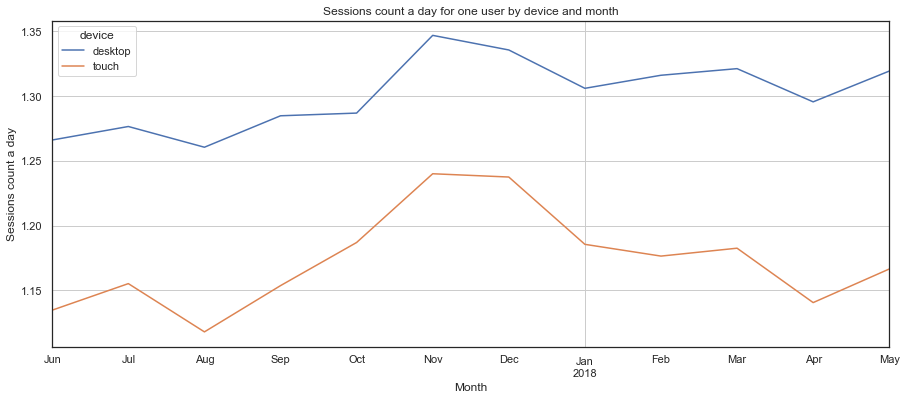

In [136]:
sessions_per_user_d.plot(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Sessions count a day')
plt.title('Sessions count a day for one user by device and month')
plt.grid(True)
plt.xlim
plt.show()

In [43]:
sessions_per_user_d.reset_index().describe()

device,desktop,touch
count,12.000000,12.000000
mean,1.301275,1.173042
std,0.027398,0.037430
min,1.260481,1.117816
25%,1.282703,1.150272
50%,1.300768,1.171379
75%,1.319782,1.185806
max,1.346905,1.239987


<div style="border:solid black 2px; padding: 20px"> On average, from desktops there are 1.3 sessions per day, from touchscreens - 1.2. </div>

In [44]:
sessions_per_user_s = visits.groupby(['session_cal_month','source_id']).agg({'uid': ['count','nunique']})
sessions_per_user_s.columns = ['n_sessions', 'n_users']
sessions_per_user_s['sessions_per_user'] = sessions_per_user_s['n_sessions'] / sessions_per_user_s['n_users']
sessions_per_user_s=sessions_per_user_s.reset_index()
sessions_per_user_s=sessions_per_user_s.pivot_table(index='session_cal_month',columns='source_id', values='sessions_per_user', aggfunc='max')
sessions_per_user_s

source_id,1,2,3,4,5,6,7,9,10
session_cal_month,,,,,,,,,
2017-06-01,1.588477,1.430157,1.049456,1.075633,1.075439,NaN,1.000000,1.092961,1.117096
2017-07-01,1.567335,1.401690,1.051131,1.070005,1.088275,1.0,1.000000,1.104982,1.079114
2017-08-01,1.575567,1.463529,1.048595,1.054011,1.081691,1.0,1.000000,1.115824,1.102459
2017-09-01,1.492473,1.420188,1.047554,1.076995,1.112936,1.0,1.000000,1.119078,1.075697
2017-10-01,1.512442,1.385672,1.056721,1.101955,1.103389,NaN,1.000000,1.117929,1.084233
2017-11-01,1.619355,1.450990,1.060059,1.120591,1.115450,1.0,1.000000,1.121640,1.189189
2017-12-01,1.607313,1.520800,1.057646,1.115127,1.115397,1.0,1.000000,1.151540,1.156200
2018-01-01,1.529879,1.482639,1.049478,1.095247,1.107180,1.0,1.000000,1.104816,1.365405
2018-02-01,1.615747,1.481165,1.055607,1.091943,1.129704,NaN,1.666667,1.083012,1.289522


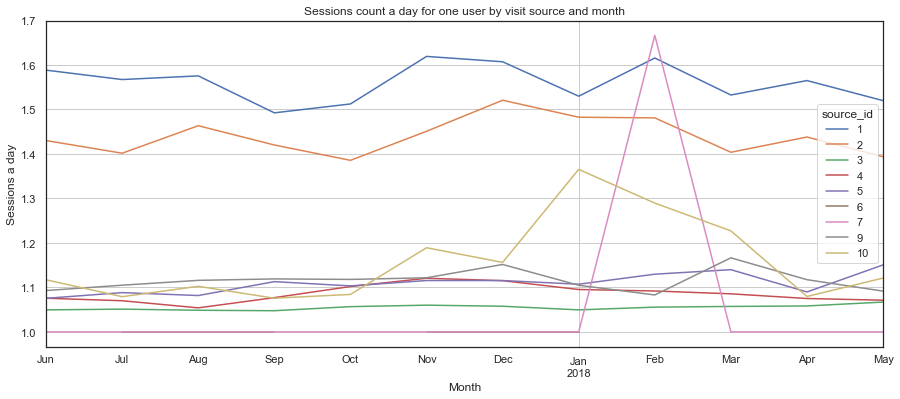

In [137]:
sessions_per_user_s.plot(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Sessions a day')
plt.title('Sessions count a day for one user by visit source and month')
plt.grid(True)
plt.xlim
plt.show()

In [46]:
sessions_per_user_s.reset_index().describe().T.sort_values(by='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
source_id,,,,,,,,
1,12.0,1.560510,0.042733,1.492473,1.527392,1.566196,1.593186,1.619355
2,12.0,1.439374,0.041641,1.385672,1.403286,1.434138,1.467938,1.520800
10,12.0,1.157214,0.093793,1.075697,1.083075,1.119037,1.198661,1.365405
9,12.0,1.115602,0.023961,1.083012,1.101852,1.116579,1.119719,1.166479
5,12.0,1.109133,0.023183,1.075439,1.089376,1.110058,1.119013,1.150570
4,12.0,1.086107,0.019604,1.054011,1.074074,1.081269,1.096924,1.120591
7,12.0,1.055556,0.192450,1.000000,1.000000,1.000000,1.000000,1.666667
3,12.0,1.054894,0.005785,1.047554,1.049473,1.056164,1.057806,1.067004
6,6.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="border:solid black 2px; padding: 20px"> On average, the most sessions are from sources 1 and 2. Source 7 had a huge peak of sessions per day in early 2018, from January to March. </div>

### Duration of one session <a id="visit_duration"></a>

In [47]:
visits['session_duration_sec'] = ((visits['end_ts'] - visits['start_ts']).dt.seconds)/60
visits['session_duration_sec'].mean()

10.725108143202156

<div style="border:solid black 2px; padding: 20px"> The average session lasts 10 minutes. </div>

In [48]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,0.0


Let's look at the distribution.

In [49]:
duration_d = visits.groupby(['session_cal_month','device']).agg({'session_duration_sec': 'mean'})
duration_d=duration_d.reset_index()
duration_d=duration_d.pivot_table(index='session_cal_month',columns='device', values='session_duration_sec', aggfunc='mean')
duration_d

device,desktop,touch
session_cal_month,,
2017-06-01,10.786223,7.658665
2017-07-01,11.106685,7.344407
2017-08-01,10.763242,6.888456
2017-09-01,10.962345,7.279509
2017-10-01,11.139726,7.900458
2017-11-01,12.750440,9.327791
2017-12-01,12.505911,8.922364
2018-01-01,12.043452,7.907803
2018-02-01,11.842008,7.832919


In [50]:
duration_d.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
desktop,12.0,11.539658,0.692390,10.763242,11.029437,11.244572,12.076249,12.750440
touch,12.0,7.828157,0.693261,6.888456,7.328183,7.745792,7.927700,9.327791


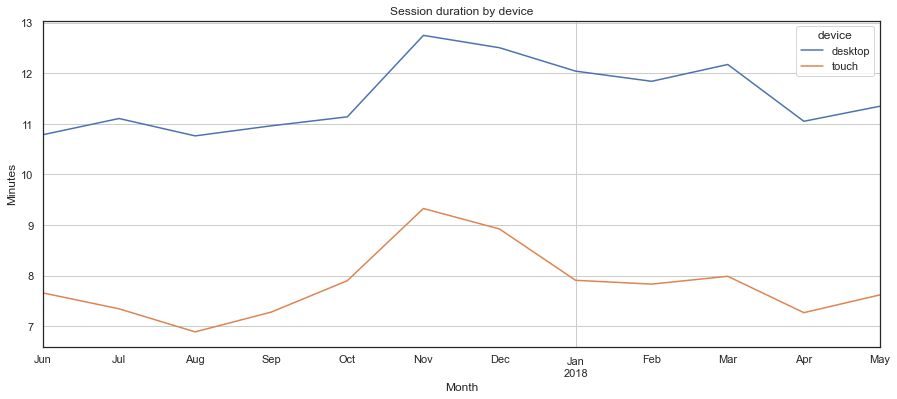

In [138]:
duration_d.plot(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.title('Session duration by device')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px"> From desktops, the session lasts on average 11.5 minutes, from the touchscreen - almost 8 minutes. The duration of the sessions increased in late autumn, early winter, around the holidays of February 23 and March 8, and in early May. So the peaks coincide with the holidays.

In [52]:
duration_s = visits.groupby(['session_cal_month','source_id']).agg({'session_duration_sec': 'mean'})
duration_s=duration_s.reset_index()
duration_s=duration_s.pivot_table(index='session_cal_month',columns='source_id', values='session_duration_sec', aggfunc='mean')
duration_s

source_id,1,2,3,4,5,6,7,9,10
session_cal_month,,,,,,,,,
2017-06-01,16.301684,14.185357,8.532405,8.654257,8.205776,NaN,2.500000,7.785703,10.665898
2017-07-01,18.732744,13.945003,8.345295,8.395911,8.133970,6.0,7.000000,8.641412,9.387097
2017-08-01,18.175020,13.223758,8.445798,8.148641,8.163836,3.0,88.000000,9.199293,8.313445
2017-09-01,15.660022,13.569730,8.743702,8.988922,8.253726,0.0,13.000000,9.431350,9.819105
2017-10-01,15.925965,12.885965,9.354649,9.475297,8.528283,NaN,4.400000,9.720640,10.198157
2017-11-01,20.201992,15.080871,10.476063,10.375676,9.035828,8.0,5.000000,10.864749,11.697869
2017-12-01,17.734141,14.732235,10.480154,10.431993,9.418734,21.0,11.222222,9.550317,9.876045
2018-01-01,16.633623,15.184678,9.722249,9.262470,9.293796,99.0,7.000000,8.356952,12.877276
2018-02-01,17.599455,14.637925,9.311055,9.264824,9.022405,NaN,2.200000,9.013369,11.497957


In [53]:
duration_s.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
source_id,,,,,,,,
6,6.0,22.833333,38.007455,0.000000,3.750000,7.000000,17.750000,99.000000
1,12.0,17.175391,1.406549,15.572936,16.067160,17.043251,17.844361,20.201992
2,12.0,13.965195,0.785827,12.885965,13.415380,13.757366,14.661502,15.184678
7,12.0,13.943519,24.196784,1.000000,2.425000,6.000000,11.666667,88.000000
10,12.0,10.544729,1.325834,8.313445,9.800020,10.139260,11.547935,12.877276
3,12.0,9.350259,0.755694,8.345295,8.690877,9.332852,9.841171,10.480154
9,12.0,9.178077,1.220178,7.742621,8.280183,9.106331,9.592898,11.780640
4,12.0,9.093240,0.740191,8.148641,8.466311,9.091504,9.317442,10.431993
5,12.0,8.706081,0.481468,8.133970,8.241738,8.750718,9.055435,9.418734


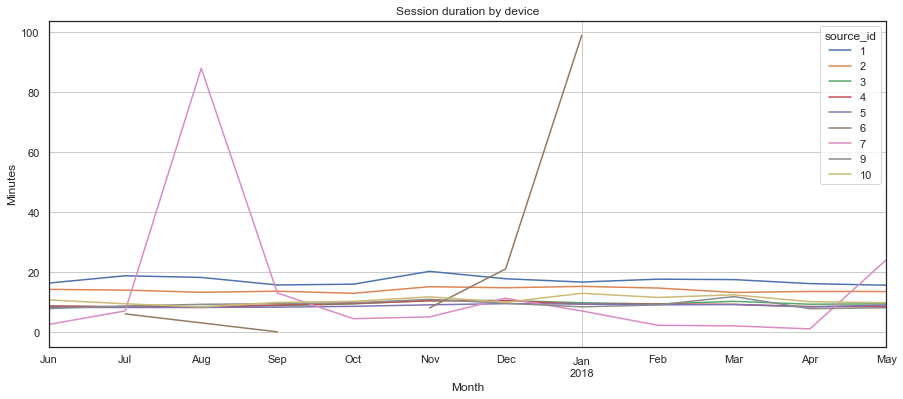

In [139]:
duration_s.plot(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.title('Session duration by device')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px"> The longest session lasted for users from sources 1 and 2. There are anomalies in the duration of sessions from sources 7 and 6: 7 has a huge jump in August, 6 - at the end of December. </div>

### Retention rate<a id="visit_retention"></a>

In [55]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')

In [56]:
visits.sample()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month,session_duration_sec,first_activity_date
266872,touch,2018-03-25 13:34:00,4,2018-03-25 13:24:00,9006395257724358448,2018,3,12,2018-03-25,2018-03-01,10.0,2018-03-19 11:19:00


In [57]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['session_date'].astype('datetime64[M]')
visits.sample()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month,session_duration_sec,first_activity_date,first_activity_month,activity_month
212414,desktop,2018-02-13 16:53:00,4,2018-02-13 16:49:00,17984412603699213922,2018,2,7,2018-02-13,2018-02-01,4.0,2018-02-13 16:49:00,2018-02-01,2018-02-01


In [58]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits.sample(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month,session_duration_sec,first_activity_date,first_activity_month,activity_month,cohort_lifetime
87078,touch,2018-04-16 13:47:00,9,2018-04-16 13:29:00,16333740229681425319,2018,4,16,2018-04-16,2018-04-01,18.0,2017-11-11 08:15:00,2017-11-01,2018-04-01,151 days
280127,touch,2017-11-15 14:53:00,1,2017-11-15 14:38:00,17685566527807988201,2017,11,46,2017-11-15,2017-11-01,15.0,2017-11-15 14:38:00,2017-11-01,2017-11-01,0 days
161046,desktop,2017-09-08 13:29:00,4,2017-09-08 13:18:00,18436622440714676117,2017,9,36,2017-09-08,2017-09-01,11.0,2017-09-08 13:18:00,2017-09-01,2017-09-01,0 days


In [59]:
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
visits.sample(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month,session_duration_sec,first_activity_date,first_activity_month,activity_month,cohort_lifetime
314157,desktop,2017-06-20 23:25:00,4,2017-06-20 23:09:00,9976816030571075498,2017,6,25,2017-06-20,2017-06-01,16.0,2017-06-20 23:09:00,2017-06-01,2017-06-01,0
324309,touch,2018-04-08 18:33:00,4,2018-04-08 18:32:00,14134705681965286935,2018,4,14,2018-04-08,2018-04-01,1.0,2018-02-13 17:57:00,2018-02-01,2018-04-01,2
294300,touch,2017-11-24 15:27:00,1,2017-11-24 15:23:00,4731697343530433794,2017,11,47,2017-11-24,2017-11-01,4.0,2017-11-24 12:33:00,2017-11-01,2017-11-01,0


In [60]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [61]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts=cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


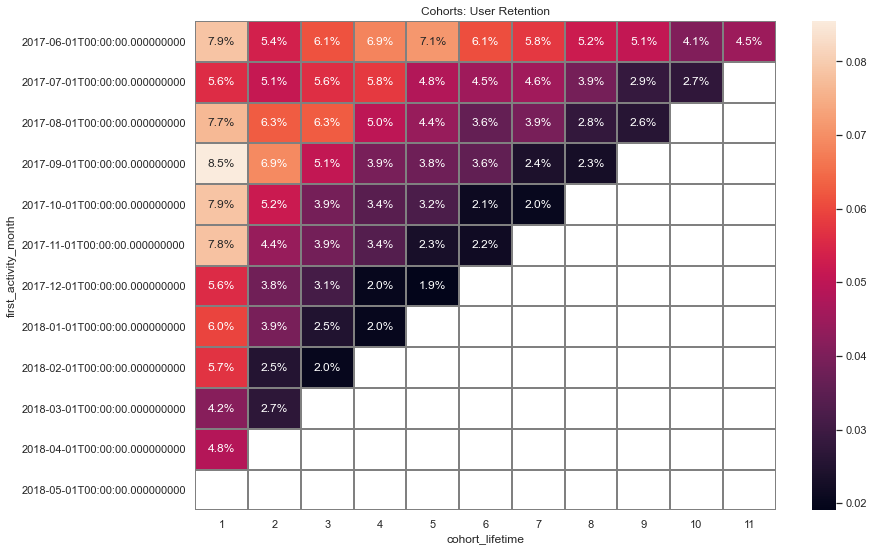

In [62]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.drop(columns = [0]), annot=True, fmt='.1%', linewidths=1, linecolor='gray');

<div style="border:solid black 2px; padding: 20px"> We see that the percentage of retention in the next month after the first visit is in range from 4.2% to 8.5%, then falls by 2%. In later cohorts, visitors returned even rarer. </div>

Now let's look at the distribution by device and source.

In [63]:
visits.sample()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_cal_month,session_duration_sec,first_activity_date,first_activity_month,activity_month,cohort_lifetime
40981,desktop,2018-01-24 15:33:00,1,2018-01-24 15:29:00,5670179032096343566,2018,1,4,2018-01-24,2018-01-01,4.0,2018-01-24 11:51:00,2018-01-01,2018-01-01,0


In [64]:
users.head()

,obtain_ts,obtain_date,obtain_month,source_id,device,obtain_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


In [65]:
visits1=visits[['uid','activity_month']]
visits1.head()

,uid,activity_month
0,16879256277535980062,2017-12-01
1,104060357244891740,2018-02-01
2,7459035603376831527,2017-07-01
3,16174680259334210214,2018-05-01
4,9969694820036681168,2017-12-01


In [66]:
retention_report=visits1.set_index('uid').join(users, how='left')[['activity_month','obtain_month','source_id','device']]
retention_report.head()

,activity_month,obtain_month,source_id,device
uid,,,,
9223535092787691177,2017-11-01,2017-11-01,1,touch
9223535092787691177,2017-11-01,2017-11-01,1,touch
9223535092787691177,2017-11-01,2017-11-01,1,touch
9223696655126052404,2017-11-01,2017-11-01,3,touch
9223707061355654945,2017-10-01,2017-10-01,9,touch


In [67]:
users.sample()

,obtain_ts,obtain_date,obtain_month,source_id,device,obtain_cost
uid,,,,,,
14676898870271055350,2018-01-28 00:47:00,2018-01-28,2018-01-01,5,touch,1.337835


In [68]:
cohorts_d_r=users.groupby(dimenstion_d).agg({'source_id':'count','obtain_cost':'sum'}).rename(columns={'source_id':'cohort_d_size'})
cohorts_d_r

,cohort_d_size,obtain_cost
device,,
desktop,160795,235065.750929
touch,67374,94000.729071


In [69]:
cohorts_s_r=users.groupby(dimenstion_s).agg({'device':'count','obtain_cost':'sum'}).rename(columns={'device':'cohort_s_size'})
cohorts_s_r

,cohort_s_size,obtain_cost
source_id,,
1,9469,20833.27
2,17616,42806.04
3,66116,141321.63
4,72346,61073.60
5,49237,51756.40
6,2,0.00
7,32,0.00
9,6448,5454.42
10,6903,5821.12


In [70]:
retention_report['cohort_lifetime']=retention_report['activity_month'] - retention_report['obtain_month']
retention_report['cohort_lifetime'] = retention_report['cohort_lifetime'] / np.timedelta64(1,'M')
retention_report['cohort_lifetime'] = retention_report['cohort_lifetime'].round().astype('int')
retention_report.head()

,activity_month,obtain_month,source_id,device,cohort_lifetime
uid,,,,,
9223535092787691177,2017-11-01,2017-11-01,1,touch,0
9223535092787691177,2017-11-01,2017-11-01,1,touch,0
9223535092787691177,2017-11-01,2017-11-01,1,touch,0
9223696655126052404,2017-11-01,2017-11-01,3,touch,0
9223707061355654945,2017-10-01,2017-10-01,9,touch,0


In [71]:
retention_report_d=retention_report.reset_index().groupby(dimenstion_d+['cohort_lifetime']).agg({'uid':'nunique'})
retention_report_d=cohorts_d_r[['cohort_d_size']].join(retention_report_d)
retention_report_d['retention'] = retention_report_d['uid']/retention_report_d['cohort_d_size']*100
retention_report_d=retention_report_d.pivot_table(index=['device'],columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_report_d=retention_report_d.drop(columns = [0])
retention_report_d

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,
desktop,6.229049,4.021891,3.228956,2.657421,2.218974,1.68351,1.298548,0.913586,0.65114,0.435337,0.295407
touch,5.638674,3.335114,2.536587,2.000772,1.555496,1.21115,0.911331,0.593701,0.39778,0.296850,0.179595


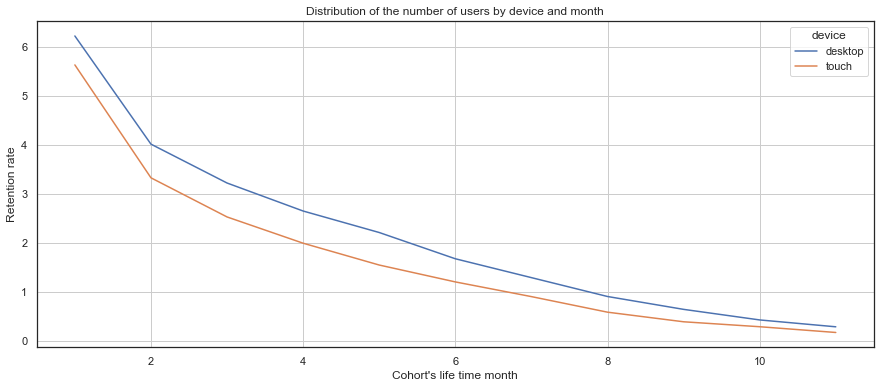

In [140]:
retention_report_d.T.plot(figsize=(15,6))
plt.xlabel("Cohort's life time month")
plt.ylabel('Retention rate')
plt.title('Distribution of the number of users by device and month')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px">  Desktops retain more users by about 1%. </div>

In [73]:
retention_report_s=retention_report.reset_index().groupby(dimenstion_s+['cohort_lifetime']).agg({'uid':'nunique'})
retention_report_s=cohorts_s_r[['cohort_s_size']].join(retention_report_s)
retention_report_s['retention'] = retention_report_s['uid']/retention_report_s['cohort_s_size']*100
retention_report_s=retention_report_s.pivot_table(index=['source_id'],columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_report_s=retention_report_s.drop(columns = [0])
retention_report_s

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,
1,10.074982,5.966839,4.340479,3.558982,2.914775,2.460661,1.879818,1.415144,1.045517,0.855423,0.623086
2,9.542461,6.255677,5.313351,4.637829,3.786331,2.974569,2.446639,1.799500,1.282925,0.976385,0.641462
3,6.052998,3.846270,3.127836,2.545526,1.975316,1.532156,1.194870,0.828846,0.550548,0.347873,0.228386
4,5.408730,3.345036,2.669118,2.047107,1.751306,1.271667,0.950986,0.598513,0.442319,0.320681,0.201808
5,4.401162,2.662632,1.986311,1.620732,1.344517,1.050023,0.763653,0.548368,0.355424,0.217316,0.127953
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3.125000,3.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.569479,8.917494,6.761787,6.234491,5.241935,3.582506,2.977667,2.264268,1.674938,0.992556,0.744417
10,5.099232,2.853832,2.028104,1.492105,1.448646,1.231349,0.680863,0.304216,0.333188,0.202810,0.231783


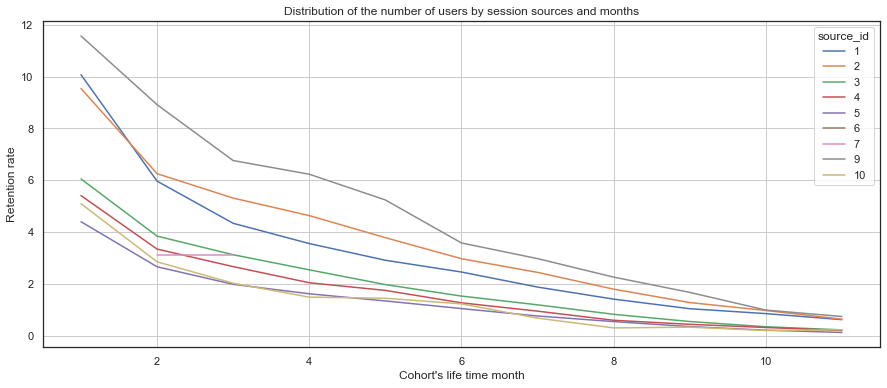

In [141]:
retention_report_s.T.plot(figsize=(15,6))
plt.xlabel("Cohort's life time month")
plt.ylabel('Retention rate')
plt.title('Distribution of the number of users by session sources and months')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px">  People who came from sources 1, 2, and 9 are more likely to return. </div>

## Orders <a id="orders"></a>

[Back to content](#content)

### When users start buying <a id="orders_delta"></a>

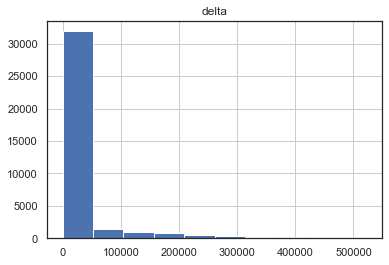

In [75]:
first_visits = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid') \
                     .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})
first_orders = orders.sort_values(by = ['uid', 'buy_ts']).groupby('uid') \
                     .agg({'buy_ts' : 'first'})
report_purchase_time = first_visits.merge(first_orders, on = 'uid')
report_purchase_time['delta'] = (report_purchase_time['buy_ts'] - report_purchase_time['start_ts']).dt.total_seconds() / 60 # минуты 
report_purchase_time[['delta']].hist()
plt.show()

In [76]:
report_purchase_time[['delta']].describe()

,delta
count,36523.000000
mean,24340.175834
std,67784.774690
min,0.000000
25%,4.000000
50%,16.000000
75%,2897.000000
max,523144.000000


<div style="border:solid black 2px; padding: 20px"> The median time between the first visit and the first purchase is 16 minutes. Let's take the median to ignore the large outliers. </div>

Let's look at the data in the context of sources and devices.

In [77]:
report_purchase_time_d=first_visits.merge(first_orders, on = 'uid')
report_purchase_time_d['delta'] = (report_purchase_time_d['buy_ts'] - report_purchase_time_d['start_ts']).dt.total_seconds() / 60
report_purchase_time_d=report_purchase_time_d.groupby('device').agg({'delta':'median'})
report_purchase_time_d

,delta
device,
desktop,15.0
touch,38.0


<div style="border:solid black 2px; padding: 20px"> Users on desktops usually buy in 15 minutes after the first visit, and from touchscreens - in 38 minutes. </div>

In [78]:
report_purchase_time_s=first_visits.merge(first_orders, on = 'uid')
report_purchase_time_s['delta'] = (report_purchase_time_s['buy_ts'] - report_purchase_time_s['start_ts']).dt.total_seconds() / 60
report_purchase_time_s=report_purchase_time_s.groupby('source_id').agg({'delta':'median'})
report_purchase_time_s.sort_values(by='delta')

,delta
source_id,
1,10.0
5,11.0
10,12.0
4,18.0
3,19.0
2,23.0
7,52.0
9,4471.5


<div style="border:solid black 2px; padding: 20px"> Users buy faster from sources 1, 5, and 10: 10, 11, and 12 minutes, respectively. </div>

### Count of purchases per period<a id="orders_count"></a>

In [79]:
orders.sample()

,buy_ts,revenue,uid
2047,2017-06-26 18:44:00,4.89,4830109334345449237


In [80]:
orders['order_month']=orders['buy_ts'].dt.month
orders['order_year']=orders['buy_ts'].dt.year
orders['order_cal_month']=orders['buy_ts'].astype('datetime64[M]')
orders.sample()

,buy_ts,revenue,uid,order_month,order_year,order_cal_month
42062,2018-03-26 15:06:00,1.33,9346089852289547924,3,2018,2018-03-01


In [81]:
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders= orders.join(first_order_date,on='uid')
orders.head()

,buy_ts,revenue,uid,order_month,order_year,order_cal_month,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017,2017-06-01,2017-06-01 07:58:00


In [82]:
orders_per_user=orders.groupby(['order_cal_month']).agg({'uid': ['count','nunique']})   
orders_per_user.columns = ['n_sessions', 'n_users']
orders_per_user['orders_per_user'] = orders_per_user['n_sessions'] / orders_per_user['n_users']
orders_per_user

,n_sessions,n_users,orders_per_user
order_cal_month,,,
2017-06-01,2354,2023,1.163618
2017-07-01,2363,1984,1.191028
2017-08-01,1807,1472,1.227582
2017-09-01,3387,2750,1.231636
2017-10-01,5679,4675,1.214759
2017-11-01,5659,4547,1.244557
2017-12-01,6218,4942,1.258195
2018-01-01,4721,3898,1.211134
2018-02-01,5281,4258,1.240254


In [83]:
orders_per_user['orders_per_user'].mean()

1.2058233446244648

<div style="border:solid black 2px; padding: 20px"> A visitor buys on the site on average a little more than once a month. </div>

### Average check <a id="orders_mean"></a>

In [84]:
orders.sample()

,buy_ts,revenue,uid,order_month,order_year,order_cal_month,first_order_date
44476,2018-04-18 10:37:00,0.3,12336719370966044682,4,2018,2018-04-01,2018-04-18 10:37:00


In [85]:
mean_order=orders['revenue'].sum()/orders['uid'].nunique()
mean_order

6.9013279303452615

<div style="border:solid black 2px; padding: 20px"> Средний чек по всем уникальным пользователям за весь период составляет примерно 7 units.  </div>

In [142]:
mean_order=orders['revenue'].sum()/len(orders)
mean_order

4.999646930477041

In [87]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy_ts            50415 non-null  datetime64[ns]
 1   revenue           50415 non-null  float64       
 2   uid               50415 non-null  uint64        
 3   order_month       50415 non-null  int64         
 4   order_year        50415 non-null  int64         
 5   order_cal_month   50415 non-null  datetime64[ns]
 6   first_order_date  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), uint64(1)
memory usage: 2.7 MB


In [88]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

First, we'll group the data by the cohort first_order_month and the month of the order order_month: 

In [89]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts.head()

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88

Let's find the average buyer's receipt revenue_per_user - we'll divide the revenue indicator by the uid. Then we will build a summary table of changes in the average receipt in the cohorts by the month of purchase and evaluate how the average receipt changes over time:

In [90]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean') 

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


Let's look at the indicators of the cohorts by life time

In [91]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y') 
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m') 
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


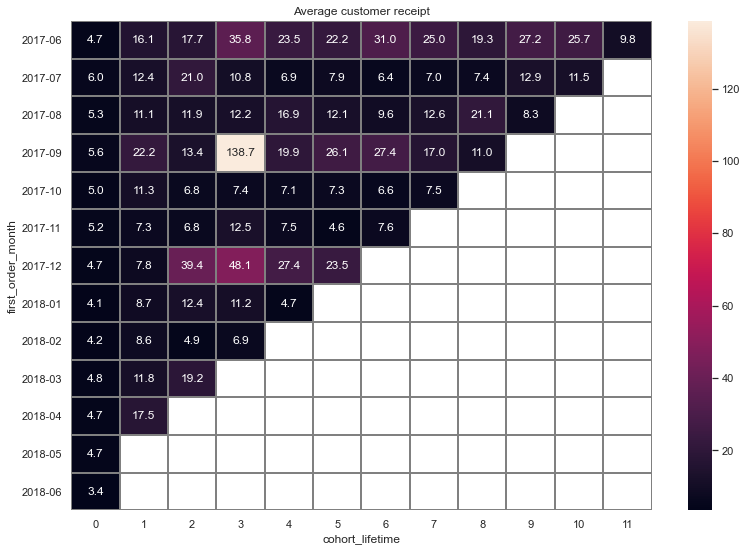

In [143]:
plt.figure(figsize=(13, 9))
plt.title('Average customer receipt')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
plt.show()

The average check increases 2-4 times in the second month. The September cohort stood out with a large average check for the third month, just before the new year. The December cohort had large average receipts.

### Lifetime Value (LTV) <a id="orders_ltv"></a>

In [93]:
orders.sample()

,buy_ts,revenue,uid,order_month,order_year,order_cal_month,first_order_date,first_order_month
47706,2018-05-17 17:16:00,4.4,7935516657866981856,2018-05-01,2018,2018-05-01,2018-05-17 17:16:00,2018-05-01


In [94]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [95]:
ltv_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
ltv_cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [96]:
ltv_report=pd.merge(cohort_sizes, ltv_cohorts, on='first_order_month')
ltv_report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [97]:
ltv_report['age'] = (ltv_report['order_month'] - ltv_report['first_order_month']) / np.timedelta64(1, 'M')
ltv_report['age'] = ltv_report['age'].round().astype('int')
ltv_report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [98]:
ltv_report['ltv'] = ltv_report['revenue'] / ltv_report['n_buyers']
ltv_report.rename(columns={'first_order_month':'obtain_month'})

,obtain_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [99]:
output_ltv = ltv_report.pivot_table(
       index='first_order_month', 
      columns='age', 
      values='ltv', 
      aggfunc='mean').round(2).cumsum(axis=1)
output_ltv.fillna('') 
output_ltv.append(pd.DataFrame(output_ltv.mean().to_frame(name='Total')).T).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01 00:00:00,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01 00:00:00,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01 00:00:00,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01 00:00:00,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01 00:00:00,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01 00:00:00,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:00:00,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 00:00:00,4.84,5.14,5.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


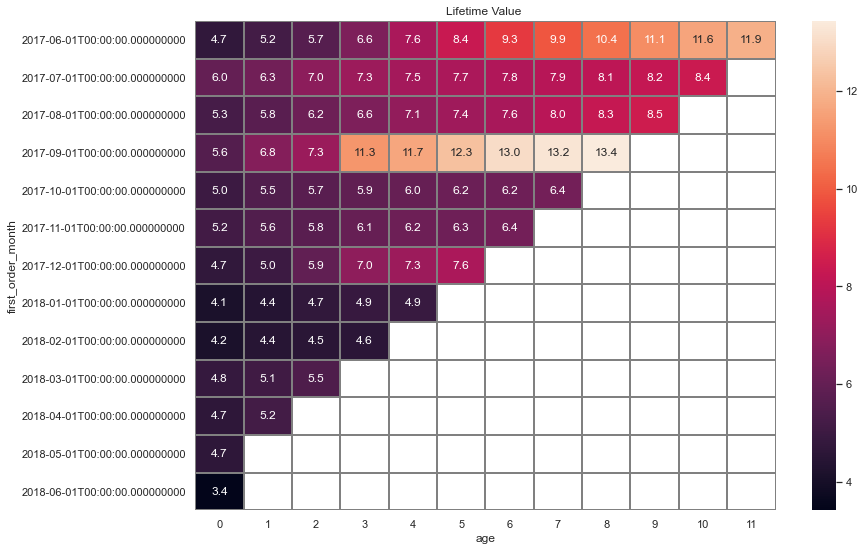

In [144]:
plt.figure(figsize=(13, 9))
plt.title('Lifetime Value ')
sns.heatmap(output_ltv, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
plt.show()

<div style="border:solid black 2px; padding: 20px"> The first month's revenue per user was 4.5 USD. The maximum was 13.5 USD. The June and September cohorts were the most profitable. </div>

In [101]:
output_ltv.append(pd.DataFrame(output_ltv.mean().to_frame(name='Total')).T).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01 00:00:00,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01 00:00:00,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01 00:00:00,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01 00:00:00,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01 00:00:00,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01 00:00:00,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:00:00,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 00:00:00,4.84,5.14,5.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look at the data grouped by device and session source.

In [102]:
users.head()

,obtain_ts,obtain_date,obtain_month,source_id,device,obtain_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


In [103]:
costs=costs.rename(columns={'dt':'obtain_date'})
costs.sample()

,source_id,obtain_date,costs
449,2,2017-08-26,45.69


In [104]:
users=(visits.sort_values(by=['uid','start_ts']).groupby('uid')
             .agg({'start_ts':'first','source_id':'first','device':'first'})
      .rename(columns={'start_ts':'obtain_ts'}))
users['obtain_date']=users['obtain_ts'].dt.date
users['obtain_month']=users['obtain_ts'].astype('datetime64[M]')
users=(users.reset_index().set_index(['source_id','obtain_date'])
       .join(costs.set_index(['source_id','obtain_date']), how='left'))
users.head()

uid           obtain_ts   device  \
source_id obtain_date                                                     
1         2017-06-01    469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01    618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01   1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01   1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01   1548840741623289234 2017-06-01 01:18:00  desktop   

                      obtain_month  costs  
source_id obtain_date                      
1         2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2  
          2017-06-01    2017-06-01   75.2

In [105]:
user_cost=(users.groupby(['source_id','obtain_date']).agg({'device':'count','costs':'mean'})
           .rename(columns={'device':'users'}))
user_cost['obtain_cost']=user_cost['costs']/user_cost['users']
users=users.join(user_cost[['obtain_cost']], how = 'left')
users=users.reset_index().set_index('uid')[['obtain_ts','obtain_date','obtain_month','source_id','device','obtain_cost']]
users.head()

,obtain_ts,obtain_date,obtain_month,source_id,device,obtain_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


In [106]:
dimenstion_d=['device']
cohorts_d_cost=users.groupby(dimenstion_d).agg({'source_id':'count','obtain_cost':'max'}).rename(columns={'source_id':'cohort_d_size'})
cohorts_d_cost

,cohort_d_size,obtain_cost
device,,
desktop,160795,19.92
touch,67374,16.33


In [107]:
dimenstion_s=['source_id']
cohorts_s_cost=users.groupby(dimenstion_s).agg({'device':'count','obtain_cost':'max'}).rename(columns={'device':'cohort_s_size'})
cohorts_s_cost

,cohort_s_size,obtain_cost
source_id,,
1,9469,12.510000
2,17616,5.276286
3,66116,5.122635
4,72346,3.462326
5,49237,3.408000
6,2,NaN
7,32,NaN
9,6448,19.920000
10,6903,12.100000


In [108]:
ltv=orders.set_index('uid').join(users, how='left')[['obtain_month','source_id','device','order_month','revenue']]
ltv['age_month']=((ltv['order_month']-ltv['obtain_month'])/np.timedelta64(1,'M')).round().astype('int')
ltv_d=ltv.groupby(dimenstion_d + ['age_month']).agg({'revenue':'sum'})
ltv_d=ltv_d.pivot_table(index=['device'],columns='age_month',values='revenue',aggfunc='sum')
ltv_d=ltv_d.cumsum(axis=1)
ltv_d=cohorts_d_cost[['cohort_d_size']].join(ltv_d)
ltv_d=ltv_d.div(ltv_d['cohort_d_size'],axis=0).drop(columns=['cohort_d_size'])
ltv_d

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


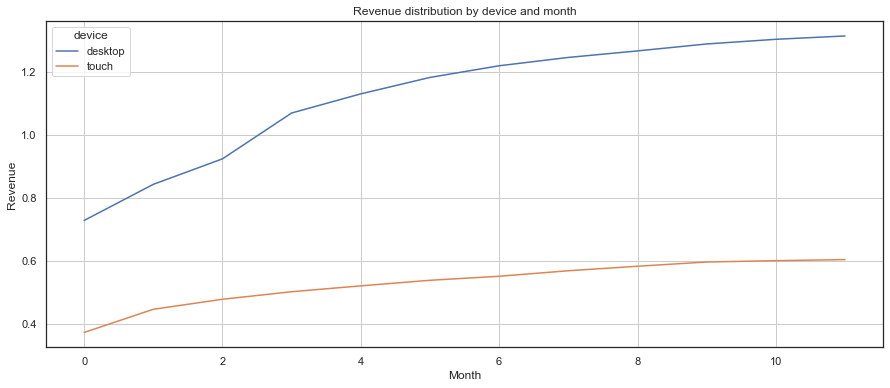

In [145]:
ltv_d.T.plot(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue distribution by device and month')
plt.grid(True)
plt.xlim
plt.show()


<div style="border:solid black 2px; padding: 20px"> Users spend twice as much money on desktops as on touchscreen devices. </div>

In [110]:
ltv_s=ltv.groupby(dimenstion_s + ['age_month']).agg({'revenue':'sum'})
ltv_s=ltv_s.pivot_table(index=['source_id'],columns='age_month',values='revenue',aggfunc='sum')
ltv_s=ltv_s.cumsum(axis=1)
ltv_s=cohorts_s_cost[['cohort_s_size']].join(ltv_s)
ltv_s=ltv_s.div(ltv_s['cohort_s_size'],axis=0).drop(columns=['cohort_s_size'])
ltv_s

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


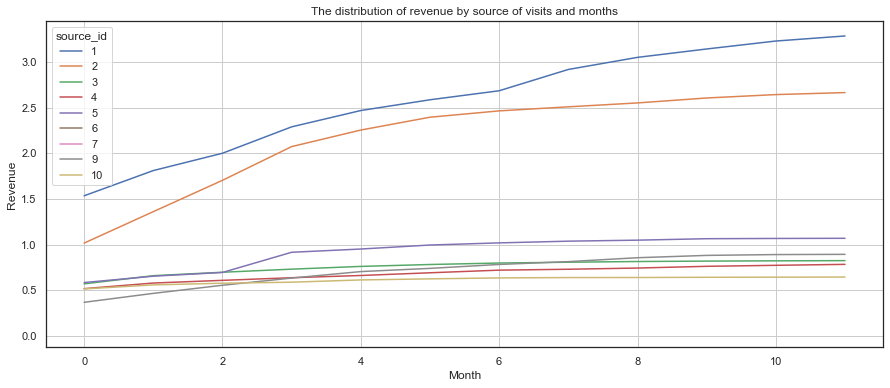

In [149]:
ltv_s.T.plot(figsize=(15,6))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('The distribution of revenue by source of visits and months')
plt.grid(True)
plt.xlim
plt.show()
plt.show()

<div style="border:solid black 2px; padding: 20px"> Users from sources 1 and 2 generate two or three times more revenue than from the rest. </div>

## Marketing <a id="marketing"></a>

[Back to content](#content)

### Total expenses / for each source / by time <a id="marketing_costs"></a>

In [112]:
costs.sample()

,source_id,obtain_date,costs
1658,5,2017-12-24,120.99


In [113]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   source_id    2542 non-null   int64         
 1   obtain_date  2542 non-null   datetime64[ns]
 2   costs        2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [114]:
costs_total_sum=costs['costs'].sum()
costs_total_sum

329131.62

<div style="border:solid black 2px; padding: 20px"> A total of 329131 units were spent. </div>

In [115]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [116]:
cost_source=costs.pivot_table(index='source_id',values='costs', aggfunc='sum')
cost_source.sort_values(by='costs', ascending=False)

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


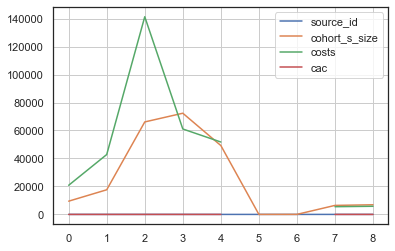

In [154]:
cost_source.plot(grid=True)
plt.show()

<div style="border:solid black 2px; padding: 20px"> The most was spent on sources 3, 4, and 5. The least was spent on sources 9 and 10. </div>

In [118]:
costs.sample()

,source_id,obtain_date,costs
2174,9,2018-05-27,11.11


In [119]:
costs1=costs
costs1['costs_month']=costs['obtain_date'].astype('datetime64[M]')
costs1.head() 

,source_id,obtain_date,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [120]:
costs_months=costs1.pivot_table(index='costs_month',values='costs', aggfunc='sum')
costs_months.reset_index()
costs_months.sort_values(by='costs', ascending=False)

,costs
costs_month,
2017-12-01,38315.35
2017-11-01,37907.88
2017-10-01,36322.88
2018-01-01,33518.52
2018-02-01,32723.03
2018-03-01,30415.27
2017-09-01,24368.91
2018-04-01,22289.38
2018-05-01,22224.27


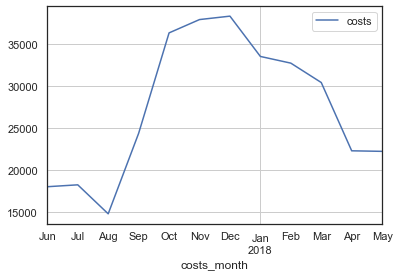

In [121]:
costs_months.plot(grid=True)
plt.show()

<div style="border:solid black 2px; padding: 20px"> Costs peaked in October, November, and December 2017. The lowest spending was in August. </div>

In [122]:
costs1.pivot_table(index='costs_month',
               columns='source_id',
               values='costs',
               aggfunc='sum')

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


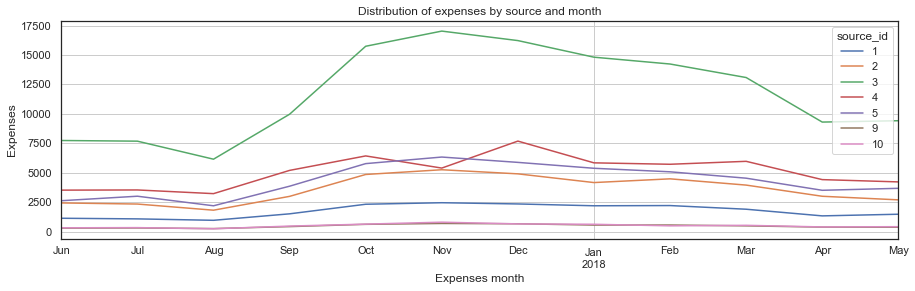

In [155]:
fig, ax=plt.subplots(figsize=(15,4))
pd.pivot_table(costs1,
               index='costs_month',
               columns='source_id',
               values='costs',
               aggfunc='sum').plot(ax=ax)
plt.xlabel('Expenses month')
plt.ylabel('Expenses')
plt.title('Distribution of expenses by source and month')
plt.grid(True)
plt.xlim
plt.show()

<div style="border:solid black 2px; padding: 20px"> The graph shows more clearly that the most was spent on source number 3, the peaks of all sources are more or less the same: in August - the least, the most in the last quarter of 2017. </div>

### Customer acquisition cost (CAC) <a id="marketing_cac"></a>

Let's calculate the expenses for the month

In [124]:
users.head()

,obtain_ts,obtain_date,obtain_month,source_id,device,obtain_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6


In [125]:
costs.head()

,source_id,obtain_date,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [126]:
cac_s=users.groupby(dimenstion_s).agg({'obtain_cost':'sum'})
cac_s=cohorts_s_cost[['cohort_s_size']].join(cac_s)
cac_s['cac']=(cac_s['obtain_cost']/cac_s['cohort_s_size']).round(2)
cac_s

,cohort_s_size,obtain_cost,cac
source_id,,,
1,9469,20833.27,2.20
2,17616,42806.04,2.43
3,66116,141321.63,2.14
4,72346,61073.60,0.84
5,49237,51756.40,1.05
6,2,0.00,0.00
7,32,0.00,0.00
9,6448,5454.42,0.85
10,6903,5821.12,0.84


<div style="border:solid black 2px; padding: 20px">  Most of the expenses were spent on attracting visitors from sources 1,2 and 3.
    
    1 - 2.2 for user
    2 - 2.4 for user
    3 - 2.1 for user
    
 </div>

In [127]:
cac_s['cac'].mean()

1.1500000000000001

### Return of investment (ROI) <a id="marketing_roi"></a>

In [128]:
cost_source=cohorts_s_cost[['cohort_s_size']].join(cost_source)
cost_source=cost_source.reset_index()
cost_source_per_user=cost_source
cost_source_per_user['cac']=cost_source['costs']/cost_source['cohort_s_size']
cost_source_per_user=cost_source_per_user.reset_index().set_index('source_id')
cost_source_per_user

,index,cohort_s_size,costs,cac
source_id,,,,
1,0,9469,20833.27,2.200155
2,1,17616,42806.04,2.429952
3,2,66116,141321.63,2.137480
4,3,72346,61073.60,0.844188
5,4,49237,51757.10,1.051183
6,5,2,NaN,NaN
7,6,32,NaN,NaN
9,7,6448,5517.49,0.855690
10,8,6903,5822.49,0.843472


In [129]:
visits['uid'].nunique()

228169

In [130]:
cost_source_per_user['cohort_s_size'].sum()

228169

In [156]:
f'Buyers count: {orders.uid.nunique()}'

'Buyers count: 36523'

In [132]:
roi_report=ltv_s.merge(cost_source_per_user[['cac']], on = 'source_id', how = 'left')
roi_report=roi_report.div(roi_report['cac'],axis=0).drop(columns=['cac'])
roi_report=roi_report.cumsum(axis=1)
roi_report

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.697297,1.520065,2.429019,3.469247,4.590691,5.765618,6.985396,8.311164,9.697064,11.124697,12.591864,14.084215
2,0.418291,0.978129,1.679211,2.532074,3.459543,4.444814,5.458600,6.490648,7.540258,8.612132,9.699319,10.795511
3,0.266843,0.575536,0.901741,1.243777,1.599884,1.965748,2.339200,2.716755,3.097943,3.481219,3.865883,4.251607
4,0.613237,1.299449,2.020463,2.775549,3.559511,4.378664,5.231884,6.096798,6.977270,7.880110,8.795963,9.724299
5,0.556108,1.178341,1.839508,2.710751,3.615938,4.562748,5.531822,6.518774,7.516222,8.528800,9.543989,10.560739
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.430370,0.975106,1.623521,2.364117,3.187502,4.051873,4.966461,5.917205,6.917974,7.948451,8.989483,10.033327
10,0.610472,1.272959,1.957307,2.654832,3.381921,4.122822,4.876017,5.633672,6.392063,7.153491,7.916263,8.680597


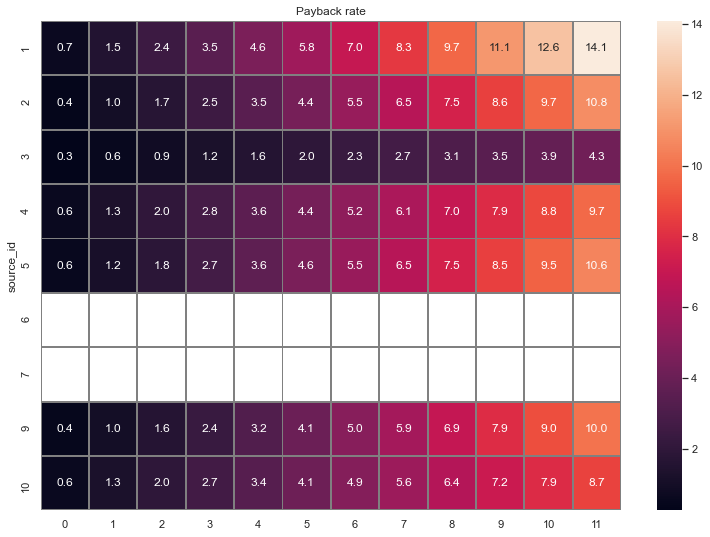

In [157]:
plt.figure(figsize=(13, 9))
plt.title('Payback rate')
sns.heatmap(roi_report, annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
plt.show()

<div style="border:solid black 2px; padding: 20px"> Users reach payback in the second month. Most of the profit is generated by users from the source 1, 2 and 5. </div>

# Summary <a id="resume"></a>

[Back to content](#content)

**Product**

- **How many people use it per day, week, month?**

On average, the resource is visited by 23 thousand people a month, ~5700 - every week, ~900 - daily. The site is used from desktops 2.5 times more than from phones and tablets. Sources 4,3 and 5 are the most popular, least popular are sources 6 and 7. The peak of attendance was in late autumn-early winter - more than 40,000 visitors (it's cold to walk outside, all sorts of holidays are coming up).
- **How many sessions per day?**

On average, there are about 1000 sessions per day on the site: 70% from desktops and 30% from touchscreens. Most of the sessions were made by users who came from sources 3 and 4.

- **How long does one session last?**

The average session lasts 10 minutes. From desktops, the session lasts on average 11.5 minutes, from the touchscreen - almost 8 minutes. The duration of the sessions increased in late autumn, early winter, around the holidays of February 23 and March 8, and in early May. That means that the peaks coincide with the holidays. The longest session lasted for users from sources 1 and 2. There are anomalies in the duration of sessions from sources 7 and 6: the 7th has a huge jump in August, and the 6th - at the end of December.

- **How often do people come back?**

The percentage of retention in the next month after the first visit from 4.2% to 8.5%, then decreases by 2%. In later cohorts, visitors returned even rarer. Users from desktops return more than users from touchscreens by about 1%. People who came from sources 1, 2, and 9 are more likely to return.

**Sales**

- **When do people start buying?**

The average time between the first visit and the purchase is 16 minutes. Users on desktops usually buy in 15 minutes after the first visit, and from touchscreens - in 38 minutes. Users buy faster from sources 1.5 and 10: 10, 11 and 12 minutes, respectively.

- **How many times do you buy during the period?**

A visitor buys on the site on average a little more than once a month.

- **What is the average check?**

The average receipt for all unique users for the entire period is approximately 7 units. The average check increases by 2-4 times in the second month. The September cohort stood out with a large average check for the third month, just before the new year. The December cohort had large average receipts.

- **How much money does it bring? (LTV)**

The first month's revenue per user was 4.5 units. The maximum was 13.5 units. The June and September cohorts were the most profitable. Users spend twice as much money on desktops as on touchscreen devices. Users from sources 1 and 2 generate two or three times more revenue than from the rest.

**Marketing**

- **How much money was spend? Total / per source / by time**

A total of 329131 units were spent. The most was spent on sources 3, 4, and 5. The least was spent on sources 9 and 10. Spending peaked in October, November, and December 2017. The lowest spending was in August.

- **How much did it cost to attract one buyer from each source?**

Spending on desktop users is twice as much as on touchscreen users. Desktop - 0.39, touchscreen-0.21. Most of the expenses were spent on attracting visitors from sources 1.2 and 3. 1 - 2.2 per user, 2 - 2.4 , 3 - 2.1.

- **How much did the expenses pay off? (ROI)**

Users reached payback in the second month. Most of all, the profit is brought by the users from the source 1,2 and 5.

# Recommendations <a id="recommendations"></a>

[Back to content](#content)

Sources 1 and 2 buy a lot, return more than others, and pay off well.
Sources 3 and 4 are among the most popular, but they do not pay off well, so we should not spend additional budget on them.
Source 5 pays off, but slowly.
Source 6 and 7 do not provide significant information.
Sources 9 and 10 generate revenue slowly.

The advertising budget should be divided between 1 and 2 sources. Since the first source has a better payback, we suggest giving more priority to the first source.